In [148]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
import matplotlib

In [149]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [462]:
def mean(arr):
    return np.mean(arr)

def error():
    return

def weighted_error(x, err):
    
    x = np.asarray(x)
    err = np.asarray(err)
    
    average = np.sum(x/(err**2))/np.sum(1/err**2)
    
    average_error = 1/np.sqrt(np.sum(1/err**2))
    
    return average, average_error

In [463]:
x0 = smp.symbols('x_0')
w = smp.symbols('\omega')
delta = smp.symbols('\delta')
t = smp.symbols('t')
o0 = smp.symbols('\Omega_0')

In [464]:
d = smp.sqrt(delta**2 - w**2)

In [465]:
A1 = x1 = smp.symbols('A_1')
A2 = x1 = smp.symbols('A_2')

In [466]:
t_range = np.linspace(0,10,1000)

## **DÚ: Řešení pro kritický útlum:**

In [467]:
x = A1*smp.exp(-delta*t) + A2*t*smp.exp(-delta*t)
x

A_1*exp(-\delta*t) + A_2*t*exp(-\delta*t)

In [468]:
dx = smp.diff(x,t)
dx

-A_1*\delta*exp(-\delta*t) - A_2*\delta*t*exp(-\delta*t) + A_2*exp(-\delta*t)

In [469]:
ddx = smp.diff(dx,t)
ddx

A_1*\delta**2*exp(-\delta*t) + A_2*\delta**2*t*exp(-\delta*t) - 2*A_2*\delta*exp(-\delta*t)

In [470]:
ddx + 2*delta*dx + delta**2*x

A_1*\delta**2*exp(-\delta*t) + A_2*\delta**2*t*exp(-\delta*t) - 2*A_2*\delta*exp(-\delta*t) + \delta**2*(A_1*exp(-\delta*t) + A_2*t*exp(-\delta*t)) + 2*\delta*(-A_1*\delta*exp(-\delta*t) - A_2*\delta*t*exp(-\delta*t) + A_2*exp(-\delta*t))

In [471]:
smp.simplify(ddx + 2*delta*dx + delta**2*x)

0

## **DÚ: Kritický útlum graf:**

In [472]:
x1 = (x0 + x0*w*t)*smp.exp(-w*t)
x1

(\omega*t*x_0 + x_0)*exp(-\omega*t)

In [473]:
x2 = o0*t*smp.exp(-w*t)
x2

\Omega_0*t*exp(-\omega*t)

In [474]:
x1_func = smp.lambdify([t,w,x0], x1)
x1_func(0,1,10)

10.0

In [475]:
x2_func = smp.lambdify([t,w,o0], x2)
x2_func(1,1,10)

3.6787944117144233

C:\Users\stepa\AppData\Local\Temp/ipykernel_4076/3223493583.py:2: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


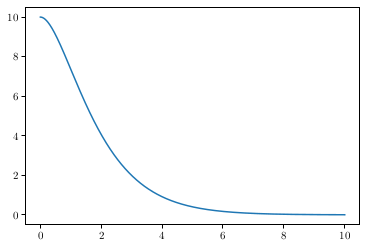

In [476]:
plt.plot(t_range, x1_func(t_range, 1,10))
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_4076/2954828898.py:2: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


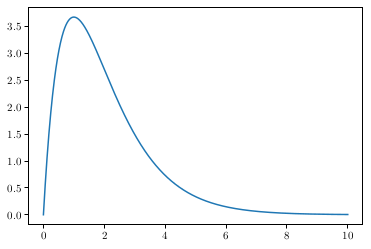

In [477]:
plt.plot(t_range, x2_func(t_range, 1,10))
plt.show()

## **DÚ: Nadkritický útlum graf:**

In [478]:
x3 = x0*smp.exp(-delta*t)*(smp.cosh(d*t)+delta/d*smp.sinh(d*t))
x3

x_0*(\delta*sinh(t*sqrt(\delta**2 - \omega**2))/sqrt(\delta**2 - \omega**2) + cosh(t*sqrt(\delta**2 - \omega**2)))*exp(-\delta*t)

In [479]:
x3_func = smp.lambdify([t,w,x0,delta], x3)
x3_func(5,1,10,4)

5.38580404702235

C:\Users\stepa\AppData\Local\Temp/ipykernel_4076/614759147.py:2: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


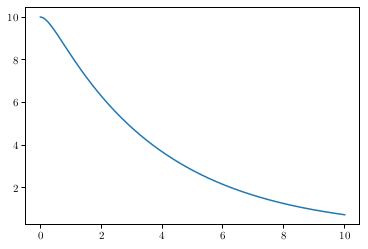

In [480]:
plt.plot(t_range, x3_func(t_range, 1,10,2))
plt.show()

In [481]:
x4 = o0/d*smp.exp(-delta*t)*smp.sinh(d*t)
x4

\Omega_0*exp(-\delta*t)*sinh(t*sqrt(\delta**2 - \omega**2))/sqrt(\delta**2 - \omega**2)

In [482]:
x4_func = smp.lambdify([t,w,o0,delta], x4)
x4_func(1,1,10,2)

2.1390913026027936

C:\Users\stepa\AppData\Local\Temp/ipykernel_4076/3534929388.py:2: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


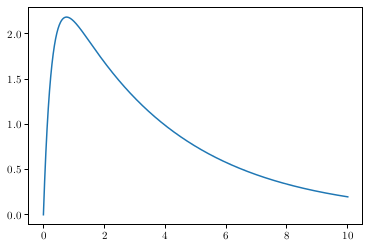

In [483]:
plt.plot(t_range, x4_func(t_range, 1,10,2))
plt.show()

## **DÚ: Graf - všechny:**

C:\Users\stepa\AppData\Local\Temp/ipykernel_4076/306420544.py:7: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


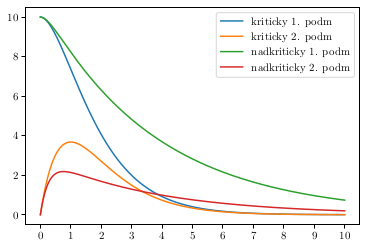

In [484]:
plt.plot(t_range, x1_func(t_range, 1,10), label = "kriticky 1. podm")
plt.plot(t_range, x2_func(t_range, 1,10), label = "kriticky 2. podm")
plt.plot(t_range, x3_func(t_range, 1,10,2), label = "nadkriticky 1. podm")
plt.plot(t_range, x4_func(t_range, 1,10,2), label = "nadkriticky 2. podm")
plt.legend()
plt.xticks(np.arange(11))
plt.show()

## **Úkol 2** 

### Definice funkci

In [497]:
def decimal(x):
    return x.replace(',', '.').encode()

def load_data(name):
    t,amplitude = np.genfromtxt((decimal(x) for x in open(name)), delimiter='\t',unpack = True, skip_header=2)
    return t,amplitude
    
def damped_oscilator(t, A, delta, w, phi, x0):
    """
    t - čas, A - amplituda, delta - koeficient útlumu, w - frekvence, phi - fázový posun, x0 - vertikální posun
    """
    return A * np.exp(-delta*t) * np.sin(w*t + phi) + x0

### Fitovaci funkce

In [498]:
def undamped_frequency(t, amplitude, p0=None):
    coef, cov = curve_fit(damped_oscilator, t,amplitude,p0 = p0)
    A, delta, w, phi, x0 = coef
    err = np.sqrt(np.diag(cov))
    
    return([A, delta, w, phi, x0], err)

### Fit undamped kmitu

In [499]:
parameters = []
parameters_err = []

for i in range(5):
    #print(undamped_frequency(*load_data("data/undapmed_{}.txt".format(i+1))))
    parameters.append(undamped_frequency(*load_data("data/undapmed_{}.txt".format(i+1)))[0])
    parameters_err.append(undamped_frequency(*load_data("data/undapmed_{}.txt".format(i+1)))[1])

parameters = np.array(parameters)
parameters_err = np.array(parameters_err)

delta_array = parameters[:,1]
w_array = parameters[:,2]

delta_err_array = parameters_err[:,1]
w_err_array = parameters_err[:,2]

print(delta_array,delta_err_array,w_array,w_err_array)
print("A: {}".format(parameters[:,0]))
print("delta: {}".format(parameters[:,1]))
print("w: {}".format(parameters[:,2]))
print("phi: {}".format(parameters[:,3]))
print("x0: {}".format(parameters[:,4]))

[0.08851888 0.07226525 0.06723027 0.06149692 0.06112109] [0.00051518 0.0002898  0.00022369 0.00018612 0.00019237] [3.73098178 3.73489082 3.73545616 3.74024381 3.7395932 ] [0.00050585 0.00028133 0.00021563 0.00018044 0.00018472]
A: [-0.9297352   0.9220149   0.92925768 -0.91563965  0.92241568]
delta: [0.08851888 0.07226525 0.06723027 0.06149692 0.06112109]
w: [3.73098178 3.73489082 3.73545616 3.74024381 3.7395932 ]
phi: [-4.38234028 -7.4285134  -7.5586269  -4.19617918 -7.25834271]
x0: [ 0.00205802 -0.02389973 -0.05398103 -0.08466559 -0.11967221]


### Fit tabulka

In [500]:
parameters_rounded = np.round(parameters,4)
parameters_err_rounded = np.round(parameters_err,4)

print(parameters_rounded)
print(parameters_err_rounded)

[[-9.2970e-01  8.8500e-02  3.7310e+00 -4.3823e+00  2.1000e-03]
 [ 9.2200e-01  7.2300e-02  3.7349e+00 -7.4285e+00 -2.3900e-02]
 [ 9.2930e-01  6.7200e-02  3.7355e+00 -7.5586e+00 -5.4000e-02]
 [-9.1560e-01  6.1500e-02  3.7402e+00 -4.1962e+00 -8.4700e-02]
 [ 9.2240e-01  6.1100e-02  3.7396e+00 -7.2583e+00 -1.1970e-01]]
[[0.0022 0.0005 0.0005 0.0023 0.0006]
 [0.0013 0.0003 0.0003 0.0014 0.0004]
 [0.001  0.0002 0.0002 0.0011 0.0003]
 [0.0009 0.0002 0.0002 0.0009 0.0003]
 [0.0009 0.0002 0.0002 0.0009 0.0003]]


In [510]:
table = []
table.append(range(1,6))
for i in range(5):
    table.append(parameters_rounded[:,i])
    table.append(parameters_err_rounded[:,i])

print(T)
T = np.array(table).T

[[-9.2970e-01  2.2000e-03  8.8500e-02  5.0000e-04  3.7310e+00  5.0000e-04
  -4.3823e+00  2.3000e-03  2.1000e-03  6.0000e-04]
 [ 9.2200e-01  1.3000e-03  7.2300e-02  3.0000e-04  3.7349e+00  3.0000e-04
  -7.4285e+00  1.4000e-03 -2.3900e-02  4.0000e-04]
 [ 9.2930e-01  1.0000e-03  6.7200e-02  2.0000e-04  3.7355e+00  2.0000e-04
  -7.5586e+00  1.1000e-03 -5.4000e-02  3.0000e-04]
 [-9.1560e-01  9.0000e-04  6.1500e-02  2.0000e-04  3.7402e+00  2.0000e-04
  -4.1962e+00  9.0000e-04 -8.4700e-02  3.0000e-04]
 [ 9.2240e-01  9.0000e-04  6.1100e-02  2.0000e-04  3.7396e+00  2.0000e-04
  -7.2583e+00  9.0000e-04 -1.1970e-01  3.0000e-04]]


In [511]:
print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrrrrrrrrrr}
\toprule
 1 & -0.9297 & 0.0022 & 0.0885 & 0.0005 & 3.731  & 0.0005 & -4.3823 & 0.0023 &  0.0021 & 0.0006 \\
 2 &  0.922  & 0.0013 & 0.0723 & 0.0003 & 3.7349 & 0.0003 & -7.4285 & 0.0014 & -0.0239 & 0.0004 \\
 3 &  0.9293 & 0.001  & 0.0672 & 0.0002 & 3.7355 & 0.0002 & -7.5586 & 0.0011 & -0.054  & 0.0003 \\
 4 & -0.9156 & 0.0009 & 0.0615 & 0.0002 & 3.7402 & 0.0002 & -4.1962 & 0.0009 & -0.0847 & 0.0003 \\
 5 &  0.9224 & 0.0009 & 0.0611 & 0.0002 & 3.7396 & 0.0002 & -7.2583 & 0.0009 & -0.1197 & 0.0003 \\
\bottomrule
\end{tabular}


### Vypocet w0

In [210]:
w0_arr = []
sw0_arr = []

for w,d,sw,sd in zip(w_array,delta_array,w_err_array,delta_err_array):
    w0_arr.append(w_to_w0(w,d))
    sw0_arr.append(w0_err(w,d,sw,sd))
    
print(w0_arr,sw0_arr)

[3.732031701928121, 3.7355898783768766, 3.7360611093276836, 3.7407493387676176, 3.7400926598135884] [0.0005058572458033002, 0.0002813345534850958, 0.00021562838035978028, 0.000180438486124095, 0.000184726311431472]


In [211]:
w0,sw0 = weighted_error(w0_arr,sw0_arr)
print(w0,sw0)

#3.729075854797502 0.001112329834640747

3.738512855290713 0.00010097965045532584


In [212]:
exp = np.log10(sw0)
exp_floor = int(np.floor(exp))  # je potreba pretypovat vysledek na cele cislo
print(exp, exp_floor)

chyba = np.round(sw0, -exp_floor)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(w0, -exp_floor)
print(hodnota)

jednotka = 's^{-1}'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

-3.9957661369638235 -4
0.0001
3.7385
$(3.7385\pm0.0001)$~s^{-1}


### Vypocet delta undamped

In [213]:
delta,sdelta = weighted_error(delta_array,delta_err_array)
print(delta,sdelta)

0.06515004582991206 0.00010451142092033035


In [214]:
exp = np.log10(sdelta)
exp_floor = int(np.floor(exp))  # je potreba pretypovat vysledek na cele cislo
print(exp, exp_floor)

chyba = np.round(sdelta, -exp_floor)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(delta, -exp_floor)
print(hodnota)

jednotka = 's^{-1}'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

-3.9808362476232313 -4
0.0001
0.0652
$(0.0652\pm0.0001)$~s^{-1}


### Tabulka w0:

In [217]:
w0_rounded = np.round(w0_arr, 4)
sw0_rounded = np.round(sw0_arr, 4)
print(w0_rounded,sw0_rounded)

T = np.array([w0_rounded,sw0_rounded]).T

[3.732  3.7356 3.7361 3.7407 3.7401] [0.0005 0.0003 0.0002 0.0002 0.0002]


In [218]:
print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rr}
\toprule
 3.732  & 0.0005 \\
 3.7356 & 0.0003 \\
 3.7361 & 0.0002 \\
 3.7407 & 0.0002 \\
 3.7401 & 0.0002 \\
\bottomrule
\end{tabular}


### Undamped plot

In [113]:
def undamped_plot(file):
    t, amplitude = load_data(file)
    t_range = np.linspace(0,12,1000)

    coef, _ = curve_fit(damped_oscilator, t,amplitude)
    A, delta, w, phi, x0 = coef

    plt.scatter(t,amplitude, s=10, marker = "x", color="b")
    plt.plot(t_range, damped_oscilator(t_range,A, delta, w, phi, x0), color="k")


C:\Users\stepa\AppData\Local\Temp/ipykernel_4076/3047106874.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


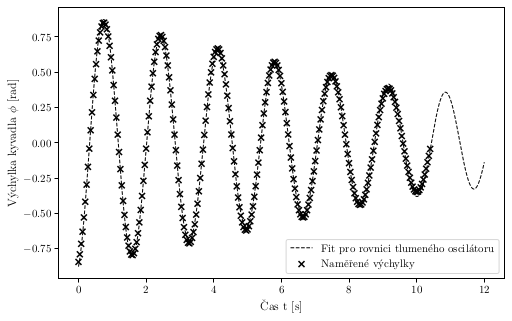

In [514]:
t, amplitude = load_data("data/undapmed_1.txt")
t_range = np.linspace(0,12,1000)

plt.figure(figsize = (8,5))

coef, _ = curve_fit(damped_oscilator, t,amplitude)
A, delta, w, phi, x0 = coef

plt.scatter(t[::2],amplitude[::2], marker = 'x', color='black', label='Naměřené výchylky')

plt.plot(t_range, damped_oscilator(t_range,A, delta, w, phi, x0), color="k", linestyle='dashed', linewidth=1, label='Fit pro rovnici tlumeného oscilátoru')

plt.legend(loc='lower right')

#popisky os
plt.ylabel("Výchylka kyvadla $ \phi $ [rad]", fontsize=12)
plt.xlabel("Čas t [s]", fontsize=12)


plt.savefig('Undamped_fit_example.pdf')
plt.show()

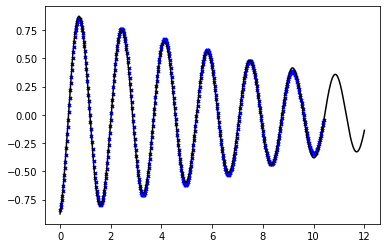

In [114]:
undamped_plot("data/undapmed_1.txt")

### Vzorec pro chybu

In [173]:
Sdelta = smp.symbols(r'\sigma_{\delta}')
Somega = smp.symbols(r'\sigma_{\omega}')
Somega0 = smp.symbols(r'\sigma_{\omega_0}')

Delta = smp.symbols('\delta')
Omega = smp.symbols('\omega')
Omega0 = smp.symbols('\omega_0}')

Omega0 = smp.sqrt(Omega**2+Delta**2)

### DERIVACE ####
dOmega0dOmega = smp.diff(Omega0,Omega)
dOmega0dDelta = smp.diff(Omega0,Delta)

###### CHYBA w0 ########
Somega0 = smp.sqrt(dOmega0dOmega**2*Somega**2 + dOmega0dDelta**2*Sdelta**2)
Somega0 = smp.simplify(Somega0)

####### w0 z Delta a w #######
w_to_w0 = smp.lambdify([Omega,Delta], Omega0)
####### W0 chyba #######
w0_err = smp.lambdify([Omega,Delta,Somega,Sdelta],Somega0)

Somega0 

sqrt((\delta**2*\sigma_{\delta}**2 + \omega**2*\sigma_{\omega}**2)/(\delta**2 + \omega**2))

## **Ukol 3**

In [ ]:
Amperage = ["0.37","0.8","1.20","1.61","2.00"]
A = [0.37,0.8,1.2,1.6,2]
data = {}

### Fit damped kmitu

In [517]:

for a in Amperage:
    
    parameters = []
    parameters_err = []
    
    for i in range(5):
        
        parameters.append(undamped_frequency(*load_data("data/damped_{}V_{}.txt".format(a,i+1)))[0])
        parameters_err.append(undamped_frequency(*load_data("data/damped_{}V_{}.txt".format(a,i+1)))[1])
        
        
    parameters = np.array(parameters)
    parameters_err = np.array(parameters_err)
    
    #print(parameters)
        
    delta_array = parameters[:,1]
    delta_err_array = parameters_err[:,1]
        
        
    data[a] = delta_array,delta_err_array
    

### Prumer a chyba tlumeni

In [518]:
delta_final = []
delta_errorbars = []

for a in Amperage:
    delta, delta_err = weighted_error(data[a][0],data[a][1])
    delta_final.append(delta)
    delta_errorbars.append(delta_err)

print(delta_final)
print(delta_errorbars)

[0.0812376631568713, 0.16199877739978075, 0.23288546191867793, 0.2907305782574725, 0.39694376554724725]
[0.00017909851048432298, 0.0007409083660568981, 0.0009742992687876936, 0.0009140263975767605, 0.0011431494686968144]


### Tabulka vyslednych delt

In [519]:
delta_rounded = np.round(delta_final, 4)
sdelta_rounded = np.round(delta_errorbars, 4)
print(delta_rounded,sdelta_rounded)

T = np.array([A,delta_rounded,sdelta_rounded]).T

print(tabulate(T, tablefmt="latex_booktabs"))

[0.0812 0.162  0.2329 0.2907 0.3969] [0.0002 0.0007 0.001  0.0009 0.0011]
\begin{tabular}{rrr}
\toprule
 0.37 & 0.0812 & 0.0002 \\
 0.8  & 0.162  & 0.0007 \\
 1.2  & 0.2329 & 0.001  \\
 1.6  & 0.2907 & 0.0009 \\
 2    & 0.3969 & 0.0011 \\
\bottomrule
\end{tabular}


### Graf

In [520]:
A = [0.37,0.8,1.2,1.6,2]
A_err = np.empty(5, dtype = float)
A_err.fill(0.01)
A_err

array([0.01, 0.01, 0.01, 0.01, 0.01])

In [521]:
def fit_funkce(x,a,b): ##definice linearni funkce, kterou se to pokusi fitnout, a je parametr, ktery bude menen pri fitovani
    return a*x**2 + b

params, cov = curve_fit(fit_funkce, A, delta_final,sigma=delta_errorbars) #provede fit a najde optimallni hodnotu koeficientu a
a,b = params
fit_error = np.sqrt(np.diag(cov))
sa,sb = fit_error

print("a: {} +- {}".format(a,sa))
print("b: {} +- {}".format(b,sb))

#a: [0.19348243] +- 0.004134746511341016
#a: [0.12687993] +- 0.04018495010250164

#a: 0.0871004236906153 +- 0.008543137359661468
#b: 0.0718048849651078 +- 0.006916268436845406


a: 0.0871004236906153 +- 0.008543137359661468
b: 0.0718048849651078 +- 0.006916268436845406


In [522]:
chyba = np.round(sa, 3)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(a, 3)
print(hodnota)

jednotka = 's^{-1}A^{-2}'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

chyba = np.round(sb, 3)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(b, 3)
print(hodnota)

jednotka = '$s^{-1}$'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

0.009
0.087
$(0.087\pm0.009)$~s^{-1}A^{-2}
0.007
0.072
$(0.072\pm0.007)$~$s^{-1}$


C:\Users\stepa\AppData\Local\Temp/ipykernel_4076/3395658652.py:18: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


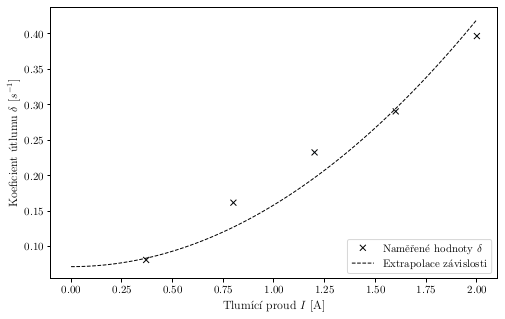

In [538]:
x_funkce = np.linspace(0,2,100)

plt.figure(figsize = (8,5))

plt.plot(A, delta_final, 'x', color='black', label='Naměřené hodnoty $\delta$')
plt.errorbar(A, delta_final, yerr=delta_errorbars, fmt='none')

plt.plot(x_funkce, fit_funkce(x_funkce,a,b), color="k", linestyle='dashed', linewidth=1, label='Extrapolace závislosti')

plt.legend(loc='lower right')

#popisky os
plt.ylabel("Koeficient útlumu $\delta$ [$s^{-1}$]", fontsize=12)
plt.xlabel("Tlumící proud $I$ [A]", fontsize=12)


plt.savefig('Current_delta.pdf')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_4076/1269560105.py:25: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


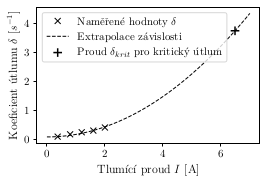

In [540]:
x_funkce = np.linspace(0,7,100)

#np.full(shape=100, fill_value=w0)

plt.figure(figsize = (4,2.5))

plt.plot(A, delta_final, 'x', color='black', label='Naměřené hodnoty $\delta$')
plt.errorbar(A, delta_final, yerr=delta_errorbars, fmt='none')

plt.plot(x_funkce, fit_funkce(x_funkce,a,b), color="k", linestyle='dashed', linewidth=1, label='Extrapolace závislosti')

plt.scatter(np.sqrt((w0 - b)/a),w0,marker='+', s=75 ,color = 'k', label = 'Proud $\delta_{krit}$ pro kritický útlum')

#plt.plot( np.full(shape=100, fill_value=np.sqrt((w0 - b)/a)) ,np.linspace(0,4.5,100), linestyle = 'dotted',color = 'k', linewidth=0.5)
#plt.plot(x_funkce,np.full(shape=100, fill_value=w0), linestyle = 'dotted',color = 'k', linewidth=0.5)

plt.legend(loc='upper left')

#popisky os
plt.ylabel("Koeficient útlumu $\delta$ [$s^{-1}$]", fontsize=12)
plt.xlabel("Tlumící proud $I$ [A]", fontsize=12)


plt.savefig('Current_delta_krit.pdf')
plt.show()

In [363]:
print(fit_funkce(0.42,a,b))
print(fit_funkce(1.42,a,b))

0.08716939970413233
0.2474341792948645


### Urceni tlumiciho proudu

In [282]:
Akrit = np.sqrt((w0 - b)/a)
Akrit

6.488256754037799

In [283]:
sAkrit = (np.sqrt(sw0**2+sb**2+(sa*(w0-b))**2))/a
sAkrit

0.36830800311248246

In [284]:
exp = np.log10(sAkrit)
exp_floor = int(np.floor(exp))  # je potreba pretypovat vysledek na cele cislo
print(exp, exp_floor)

chyba = np.round(sAkrit, -exp_floor)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(Akrit, -exp_floor)
print(hodnota)

jednotka = 'A'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

-0.43378884408338086 -1
0.4
6.5
$(6.5\pm0.4)$~A


## **Ukol 5**

In [541]:
V = [2.01,4.02,6.01, 8, 10.07,12.06,14.07,15.98,17.84]
RPM = [6.6,16.1,24.3,33.1,42.5,51.3,60.2,69.1,78.4]
print(V)
print(RPM)

[2.01, 4.02, 6.01, 8, 10.07, 12.06, 14.07, 15.98, 17.84]
[6.6, 16.1, 24.3, 33.1, 42.5, 51.3, 60.2, 69.1, 78.4]


In [542]:
T = np.array([V,RPM]).T

print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rr}
\toprule
  2.01 &  6.6 \\
  4.02 & 16.1 \\
  6.01 & 24.3 \\
  8    & 33.1 \\
 10.07 & 42.5 \\
 12.06 & 51.3 \\
 14.07 & 60.2 \\
 15.98 & 69.1 \\
 17.84 & 78.4 \\
\bottomrule
\end{tabular}


In [543]:
def RPM_func(voltage,a,b):
    return a*voltage + b

coef, cov = curve_fit(RPM_func, V, RPM)

fit_error = np.sqrt(np.diag(cov))

a,b = coef
sa,sb = fit_error

print(a,b)
print(sa,sb)

4.490780426273802 -2.537742820735353
0.02993058268990041 0.33667432558795213


In [544]:
chyba = np.round(sa, 3)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(a, 3)
print(hodnota)

jednotka = '$ot \cdot V^{-1} \cdot min^{-1}$'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

chyba = np.round(sb, 1)  # zaporna hodnota udava pocet desetinnych mist
print(chyba)

hodnota = np.round(b, 1)
print(hodnota)

jednotka = 'ot/min'
vysledek = '$({}\pm{})$~{}'.format(hodnota, chyba, jednotka)  # funkce format vlozi promenne do sloznych zavorek {}
print(vysledek)

0.03
4.491
$(4.491\pm0.03)$~$ot \cdot V^{-1} \cdot min^{-1}$
0.3
-2.5
$(-2.5\pm0.3)$~ot/min


C:\Users\stepa\AppData\Local\Temp/ipykernel_4076/28143007.py:17: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


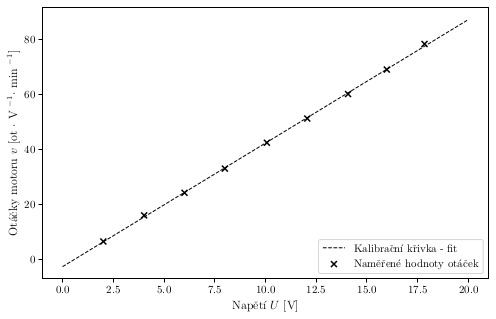

In [545]:
x_range = np.linspace(0,20,100)

plt.figure(figsize = (8,5))

plt.scatter(V, RPM, marker = 'x', color='black', label='Naměřené hodnoty otáček')

plt.plot(x_range, RPM_func(x_range,a,b), color="k", linestyle='dashed', linewidth=1, label='Kalibrační křivka - fit')

plt.legend(loc='lower right')

#popisky os
plt.ylabel("Otáčky motoru $v$ [ot $\cdot$ V $^{-1} \cdot$ min $^{-1}$]", fontsize=12)
plt.xlabel("Napětí $U$ [V]", fontsize=12)


plt.savefig('Calibration_curve.pdf')
plt.show()

## **Ukol 6**

In [428]:
def rpm_to_omega(x):
    return 2*np.pi*x/60


In [429]:
def forced_funkce(freq,d,omega,B):
    return B/np.sqrt(4*(d**2)*(freq**2)+ (omega**2-freq**2)**2)

def forced_funkce1(freq,omega,B):
    return B/np.sqrt(4*(0.06515004582991206**2)*(freq**2)+ (omega**2-freq**2)**2)

def forced_funkce2(freq,omega,B):
    return B/np.sqrt(4*(0.08716939970413233**2)*(freq**2)+ (omega**2-freq**2)**2)

def forced_funkce3(freq,omega,B):
    return B/np.sqrt(4*(0.2474341792948645**2)*(freq**2)+ (omega**2-freq**2)**2)

### Bez útlumu

In [456]:
#V1 = np.array([4.42,5.20,5.67,6.57,7.22,7.66,7.89,8.01,8.19,8.33,8.55,8.84,9.19,9.45,10.18,10.56]) ##u 8.8 nepresne, protoze kyvadlo nemuze kmitad dal kvuli zarazce
#amplitude1 = np.array([0.187,0.251,0.284,0.335,0.419,0.595,0.737,0.847,1.199,1.817,2.683,2.512,2.408, 3.043,2.44,2.256])
V1 =         np.array([4.42,5.20,5.67,6.57,7.22,7.66,7.89,8.01,8.19,8.55]) ##u 8.8 nepresne, protoze kyvadlo nemuze kmitad dal kvuli zarazce
amplitude1 = np.array([0.187,0.251,0.284,0.335,0.419,0.595,0.737,0.847,1.199,2.683])

frequency1 = rpm_to_omega(RPM_func(V1,a,b))
frequency1_normalised = frequency1/w0

In [457]:
T = np.array([V1,np.round(frequency1,2),amplitude1]).T
print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
 4.42 & 1.81 & 0.187 \\
 5.2  & 2.18 & 0.251 \\
 5.67 & 2.4  & 0.284 \\
 6.57 & 2.82 & 0.335 \\
 7.22 & 3.13 & 0.419 \\
 7.66 & 3.34 & 0.595 \\
 7.89 & 3.44 & 0.737 \\
 8.01 & 3.5  & 0.847 \\
 8.19 & 3.59 & 1.199 \\
 8.55 & 3.76 & 2.683 \\
\bottomrule
\end{tabular}


In [458]:
coef, cov = curve_fit(forced_funkce, frequency1, amplitude1,p0=[0.065,3.7385,4])
fit_error = np.sqrt(np.diag(cov))

d1,omega1,B1 = coef
sd1,somega1,sB1 = fit_error

print(d1,omega1,B1)
print(sd1,somega1,sB1)
#-0.2724697785967196 4.303232757923573 7.953860764908469
#3.8304213602270107 2.3722988741289313
#4.312121468716889 7.685201401485017

0.08461605240286564 3.814867633819167 2.093908384042147
0.00929110029823805 0.022987008832927945 0.13614884802302352


### Slabý útlum 0.42A

In [392]:
V2 = np.array([11.62,10.6,9.6,8.75,8.19,7.95,7.43,7.04,6.04] ) ##u 8.8 nepresne, protoze kyvadlo nemuze kmitad dal kvuli zarazce
amplitude2 = np.array([0.126,0.163,0.270,1.067,1.544,0.982,0.592,0.402,0.311])
frequency2 = rpm_to_omega(RPM_func(V2,a,b))
frequency2_normalised = frequency2/w0

In [393]:
T = np.array([V2,np.round(frequency2,2),amplitude2]).T
print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
 11.62 & 5.2  & 0.126 \\
 10.6  & 4.72 & 0.163 \\
  9.6  & 4.25 & 0.27  \\
  8.75 & 3.85 & 1.067 \\
  8.19 & 3.59 & 1.544 \\
  7.95 & 3.47 & 0.982 \\
  7.43 & 3.23 & 0.592 \\
  7.04 & 3.04 & 0.402 \\
  6.04 & 2.57 & 0.311 \\
\bottomrule
\end{tabular}


In [459]:
coef, cov = curve_fit(forced_funkce, frequency2, amplitude2,p0=[0.0871,3.7385,1.2])
fit_error = np.sqrt(np.diag(cov))

d2,omega2,B2 = coef
sd2,somega2,sB2 = fit_error

print(d2,omega2,B2)
print(sd2,somega2,sB2)

#0.12393288937977351 3.675734146177971 1.7013656946340239
#3.6854552383256842 1.5304239595614322

0.12393287607705254 3.6757341529385594 1.7013656381107656
0.0150632785524684 0.008662225912303222 0.09108604981322449


### Silný útlum 1.42A

In [395]:
V3 = np.array([6.3,7.24,7.54,7.87,8.12,8.53,8.93,9.47,10.18,11.36,12.30]) ##u 8.8 nepresne, protoze kyvadlo nemuze kmitad dal kvuli zarazce
amplitude3 = np.array([0.115,0.207,0.3,0.380,0.551,0.62,0.434,0.256,0.201,0.129,0.104])
frequency3 = rpm_to_omega(RPM_func(V3,a,b))
frequency3_normalised = frequency3/w0

In [396]:
T = np.array([V3,np.round(frequency3,2),amplitude3]).T
print(tabulate(T, tablefmt="latex_booktabs"))

\begin{tabular}{rrr}
\toprule
  6.3  & 2.7  & 0.115 \\
  7.24 & 3.14 & 0.207 \\
  7.54 & 3.28 & 0.3   \\
  7.87 & 3.44 & 0.38  \\
  8.12 & 3.55 & 0.551 \\
  8.53 & 3.75 & 0.62  \\
  8.93 & 3.93 & 0.434 \\
  9.47 & 4.19 & 0.256 \\
 10.18 & 4.52 & 0.201 \\
 11.36 & 5.08 & 0.129 \\
 12.3  & 5.52 & 0.104 \\
\bottomrule
\end{tabular}


In [460]:
coef, cov = curve_fit(forced_funkce, frequency3, amplitude3,p0=[0.247,3.7385,1.1])
fit_error = np.sqrt(np.diag(cov))

d3,omega3,B3 = coef
sd3,somega3,sB3 = fit_error

print(d3,omega3,B3)
print(sd3,somega3,sB3)
#0.21843217808197712 3.727226157910776 1.0335794150537838
#3.736075837659399 1.1160277681171153

0.21843226667557006 3.727226103275367 1.0335796328136233
0.023197918506624615 0.01970941048765986 0.07512010459839041


### Graf

C:\Users\stepa\AppData\Local\Temp/ipykernel_4076/3963019883.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


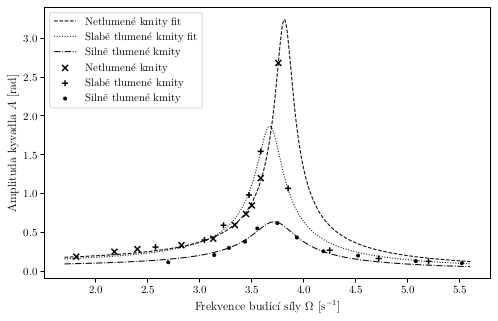

In [551]:
x_range = np.linspace(1.7,5.6,500)

plt.figure(figsize = (8,5))

plt.scatter(frequency1,amplitude1, marker = 'x', color='black', label='Netlumené kmity')
plt.scatter(frequency2,amplitude2, marker = '+', color='black', label='Slabě tlumené kmity')
plt.scatter(frequency3,amplitude3, marker = '.', color='black', label='Silně tlumené kmity')

plt.plot(x_range, forced_funkce(x_range, d1,omega1,B1), color="k", linestyle='dashed', linewidth=1, label='Netlumené kmity fit')
plt.plot(x_range, forced_funkce(x_range, d2,omega2,B2), color="k", linestyle='dotted', linewidth=1, label='Slabě tlumené kmity fit')
plt.plot(x_range, forced_funkce(x_range, d3,omega3,B3), color="k", linestyle='dashdot', linewidth=1, label='Silně tlumené kmity')

plt.legend(loc='upper left')

#popisky os
plt.ylabel("Amplituda kyvadla $A$ [rad]", fontsize=12)
plt.xlabel("Frekvence budící síly $\Omega$ [s$^{-1}$]", fontsize=12)


plt.savefig('Resonance_curve.pdf')
plt.show()

In [550]:
k = np.array([3.814867633819167,3.6757341529385594,3.727226103275367])
#k_err = np.array([0.022987008832927945,0.008662225912303222,0.01970941048765986])
k_err = np.array([1,1,1])

m,n = weighted_error(k,k_err)

print(m)
print(n)

3.739275963344364
0.5773502691896258


In [548]:
w0

3.738512855290713